Importing Libraries and data

In [ ]:
import pandas as pd #used for data preparation
import numpy as np #linear algebra operations
import matplotlib.pyplot as plt #crreating visualizations using python
import plotly.express as px #used for data visualization
import seaborn as sns #used for creating statistical visualizations
from textblob import TextBlob #used for sentiment Analysis

In [ ]:
df=pd.read_csv("C:\\Users\\dolik\\Downloads\\netflix1.csv")
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


Checking content available in data

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


How to check columns name of dataset

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

Taking the count of ratings available

In [ ]:
x=df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0          G      41
1      NC-17       3
2         NR      79
3         PG     287
4      PG-13     490
5          R     799
6      TV-14    2157
7       TV-G     220
8      TV-MA    3205
9      TV-PG     861
10      TV-Y     306
11     TV-Y7     333
12  TV-Y7-FV       6
13        UR       3


Checking the datatypes of the columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
df.nunique()

show_id         8790
type               2
title           8787
director        4528
country           86
date_added      1713
release_year      74
rating            14
duration         220
listed_in        513
dtype: int64

Data Visualization

What is the most frequent genre of movie that is in listed_in column on Netflix?

In [ ]:
df["listed_in"].describe()

count                             8790
unique                             513
top       Dramas, International Movies
freq                               362
Name: listed_in, dtype: object

Counting the types on Netflix that customers are most instrested

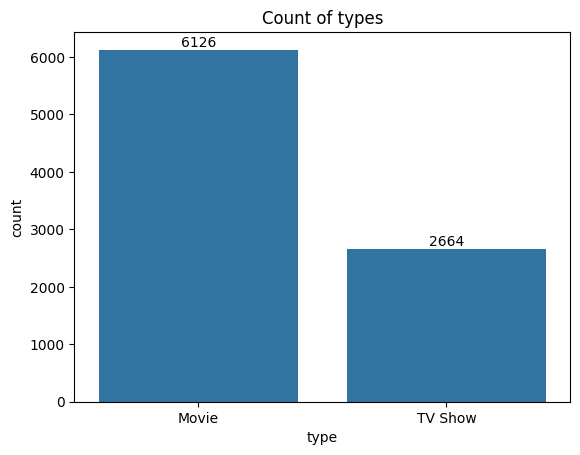

In [ ]:
ax=sns.countplot(x='type',data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of types")
plt.show()

Creating the piechart based on Content rating

In [ ]:
x=df.groupby(['rating']).size().reset_index(name='counts')
print(x)
pieChart=px.pie(x,values='counts',names='rating', title='Distribution of content ratings on Netflix')
pieChart.show()

      rating  counts
0          G      41
1      NC-17       3
2         NR      79
3         PG     287
4      PG-13     490
5          R     799
6      TV-14    2157
7       TV-G     220
8      TV-MA    3205
9      TV-PG     861
10      TV-Y     306
11     TV-Y7     333
12  TV-Y7-FV       6
13        UR       3


In [ ]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
df.replace('Not Given','Director not specified',inplace=True)
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Director not specified,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Director not specified,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Director not specified,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Director not specified,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


Analyzing the Top 5 Directiors on Netflix

In [ ]:
directors_list=pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
directors_list=df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0           Julien Leclercq
2     0             Mike Flanagan
3     0             Bruno Garotti
4     0              Haile Gerima
                    ...          
8785  0    Director not specified
8786  0    Director not specified
8787  0    Director not specified
8788  0    Director not specified
8789  0    Director not specified
Length: 9610, dtype: object


In [ ]:
directors_list=directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0         Julien Leclercq
2    0           Mike Flanagan
3    0           Bruno Garotti
4    0            Haile Gerima
...                        ...
8785 0  Director not specified
8786 0  Director not specified
8787 0  Director not specified
8788 0  Director not specified
8789 0  Director not specified

[9610 rows x 1 columns]


In [ ]:
directors_list.columns=['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0         Julien Leclercq
2    0           Mike Flanagan
3    0           Bruno Garotti
4    0            Haile Gerima
...                        ...
8785 0  Director not specified
8786 0  Director not specified
8787 0  Director not specified
8788 0  Director not specified
8789 0  Director not specified

[9610 rows x 1 columns]


In [ ]:
directors=directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5115                Çagan Irmak            1
5116           Ísold Uggadóttir            1
5117        Óskar Thór Axelsson            1
5118           Ömer Faruk Sorak            2
5119               Şenol Sönmez            2

[5120 rows x 2 columns]


In [ ]:
directors=directors[directors.Director !='Director not specified']
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5115                Çagan Irmak            1
5116           Ísold Uggadóttir            1
5117        Óskar Thór Axelsson            1
5118           Ömer Faruk Sorak            2
5119               Şenol Sönmez            2

[5119 rows x 2 columns]


In [ ]:
directors=directors.sort_values(by=['Total Count'],ascending=False)
print(directors)

                 Director  Total Count
4020        Rajiv Chilaka           23
841   Alastair Fothergill           19
4067          Raúl Campos           18
261             Jan Suter           18
4651          Suhas Kadav           16
...                   ...          ...
5115          Çagan Irmak            1
5116     Ísold Uggadóttir            1
5117  Óskar Thór Axelsson            1
596           Seung-uk Jo            1
12               Adam Nee            1

[5119 rows x 2 columns]


In [ ]:
top5directors=directors.head()
print(top5directors)

                 Director  Total Count
4020        Rajiv Chilaka           23
841   Alastair Fothergill           19
4067          Raúl Campos           18
261             Jan Suter           18
4651          Suhas Kadav           16


In [ ]:
barChart=px.bar(top5directors,x='Total Count', y='Director',title='Top 5 Directors of Netflix')
barChart.show()

Anaslyzing the content produced on Netflix based on years

In [ ]:
df1=df[['type','release_year']]
df1=df.rename(columns={"release_year": "Release Year","type":"Type"})
df2=df1.groupby(['Release Year','Type']).size().reset_index(name='Total Count')

In [ ]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


In [ ]:
df2=df2[df2['Release Year']>=2000]
graph=px.line(df2,x= "Release Year", y="Total Count", color="Type", title= "Trend of Content Produced on Netflix Every Year")
graph.show()

Analyzing Top 10 Countries that produced number of Movies/Tv shows on Netfllix

In [ ]:
country_counts=df['country'].value_counts().dropna().head(10)
barChart=px.bar(x=country_counts.index,
    y=country_counts.values,
    labels={'x': 'Country', 'y': 'Number of Movies/TV Shows'},
    title='Top 10 Countries by Number of Movies/TV Shows on Netflix',
    color=country_counts.values,
    color_continuous_scale='Viridis'
)
barChart.show()

Sentiment Analysis of Netflix content

In [ ]:
df3=df[['release_year','listed_in']]
df3=df3.rename(columns={'release_year':'Release Year','listed_in':'Description'})
for index, row in df3.iterrows():
    d=row['Description']
    testimonial = TextBlob(d)
    p = testimonial.sentiment.polarity
    if p==0:
        sent='Netural'
    elif p>0:
        sent ='Positive'
    else:
        sent ='Negative'
    df3.loc[[index,2], 'Sentiment']=sent
df3=df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name= 'Total Count')
df3=df3[df3['Release Year']>2005]
barGraph=px.bar(df3, x='Release Year', y='Total Count', color= 'Sentiment', title='Sentiment Analysis of content in Netflix ')
barGraph.show()
